# Sanafrekvenssien lasku korp-tiede tekstidatasetistä

Tässä notebookissa tehdään yleistason tekstidatan tarkastelua. Ensin lasketaan datasetin sanojen ja sanaparien (bigramien) frekvenssit ja lopuksi tarkastellaan sanojen kosini-samankaltaisuuksia toisiinsa T-SNE-kuvaajalla.<br>
Datasetti käsittelee Suomi24 foorumiviestejä, joissa on maininta sanasta "tiede". Datasetti haettiin <a href="https://korp.csc.fi/#?stats_reduce=word&cqp=%5B%5D&corpus=ftb3_europarl,ftb3_jrcacquis,ftb2,reittidemo">Kielipankin Korp-käyttöliittymällä</a>.

### Ladataan tarvittavat paketit

In [1]:
#from nltk.stem.snowball import SnowballStemmer # Paketti suomalaisten sanojen taivutusmuotojen poistamiseen, mutta datasetin termit ovat jo stemmattu
from IPython.core.display import display, HTML
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
import pandas as pd
import itertools
#nltk.download('punkt')

#stemmer = SnowballStemmer("finnish")
display(HTML("<style>.container { width:100% !important; }</style>"))

### Ladataan ja tarkastellaan korp-datasettiä

In [2]:
df1 = pd.read_csv("KorpData/korp_kwic_tiede_tiede_1.tsv", sep="\t", engine='python', encoding="utf-8")
df2 = pd.read_csv("KorpData/korp_kwic_tiede_tiede_2.tsv", sep="\t", engine='python', encoding="utf-8")
df3 = pd.read_csv("KorpData/korp_kwic_tiede_tiede_3.tsv", sep="\t", engine='python', encoding="utf-8").iloc[0:800, :]
testidata = pd.DataFrame()
testidata = testidata.append([df1, df2, df3])

In [3]:
testidata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2800 entries, 0 to 799
Data columns (total 23 columns):
hit number            2800 non-null int64
corpus                2800 non-null object
tokens                2800 non-null object
lemmas                2800 non-null object
text_filename         2799 non-null object
chapter_id            2010 non-null float64
chapter_title         2011 non-null object
paragraph_id          2799 non-null object
speech_speakerid      2408 non-null float64
speech_speakername    2408 non-null object
speech_language       2409 non-null object
sentence_id           2800 non-null int64
sentence_line         2800 non-null object
text_title            392 non-null object
text_codetitle        392 non-null object
text_url              392 non-null object
URN                   2800 non-null object
metadata link         2800 non-null object
licence               2800 non-null object
date                  2800 non-null object
total hits            2800 non-null o

### Tekstidatan sanafrekvenssien lasku

In [4]:
from nltk.corpus import stopwords

stopWords = set(stopwords.words('finnish'))
specials = [",", ".", ">", "<", ";", ":", "!", "?", "[", "]", "{", "}", "(", ")", "/", "="]
wordsFiltered = []
stemmedWords = []
tokens = []

for teksti in testidata['lemmas']:
    tokens.append(word_tokenize(teksti))
    
tokens = list(itertools.chain.from_iterable(tokens)) # luikautetaan listat listassa yhdeksi listaksi
    
for token in tokens:
    if token not in stopWords and token not in specials:
        wordsFiltered.append(token)

"""
# Sanojen stemmaus: jos sanoja ei ole lemmatisoitu, niin tätä voi käyttää taivutusmuotojen poistamiseen
# FiNER työkalulla on mahdollista lemmatisoida sanat

for word in wordsFiltered:
    stemmedWords.append(stemmer.stem(word))

for word in stemmedWords:
    try:
        if isinstance(int(word), int):
            stemmedWords.remove(word)
    except:
        pass

"""

wordfreq = {}

for word in wordsFiltered: # jos käytetään stemmausta -> stemmedWords:
        if word not in wordfreq.keys():
            wordfreq[word] = 1
        else:
            wordfreq[word] += 1

### Tulosten tarkastelu

In [5]:
df = pd.DataFrame.from_dict(wordfreq, orient='index', columns=['frekvenssi'])
df = df.reset_index()

df2 = df[df['index'].map(len) > 3]

df2.sort_values(by='frekvenssi', ascending=False).head(20)

index  frekvenssi
61         tietää        1216
213      Eurooppa         593
3           voida         531
154         tiede         510
1        komissio         447
798  tiedekomitea         376
75           myös         368
118     tiedemies         366
425        koskea         323
9           antaa         312
321         tehdä         302
590         ottaa         292
82          kuten         291
110        kaikki         268
448       yhteisö         266
148         saada         238
496        huomio         237
189      tutkimus         235
164          asia         218
123   jäsenvaltio         207

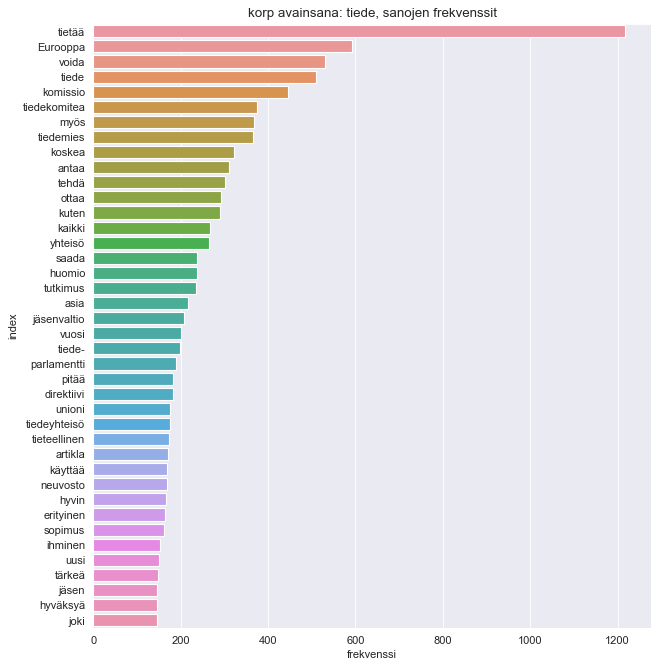

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[9,10], dpi=80)
sns.set_style("darkgrid")
plt.title("korp avainsana: tiede, sanojen frekvenssit")
sns.barplot(x="frekvenssi", y="index", data=df2.sort_values(by='frekvenssi', ascending=False).head(40))

Datasetissä ilmenee selkeästi eniten sana "tiede", mikä ei ole yllättävää, sillä datasetti haettiin Korp-käyttöliittymästä avainsanalla "tiede". Datasetissä kuitenkin ilmenee muita kiinnostavia sanoja, kuten "voida", mikä saattaa viitata, mitä tieteellä "voidaan" tehdä, taikka tietää. Lisäksi, datasetissä ilmenee uskontoon viittaavia termejä, mikä voi viitata tieteen ja uskonnon väliseen vertailuun foorumikeskusteluissa.

In [6]:
wordsFiltered2 = []
for word in wordsFiltered:
    if len(word) > 2: # haetaan vain 3 merkkiä pitkät sanat
        wordsFiltered2.append(word)
    else:
        pass
    
bigrams = (list(nltk.bigrams(wordsFiltered2))) # luodaan merkkijonoista bigramit

wordfreq2 = {}

# lasketaan bigramien frekvenssit
for bigram in bigrams:
        if bigram not in wordfreq2.keys():
            wordfreq2[bigram] = 1
        else:
            wordfreq2[bigram] += 1

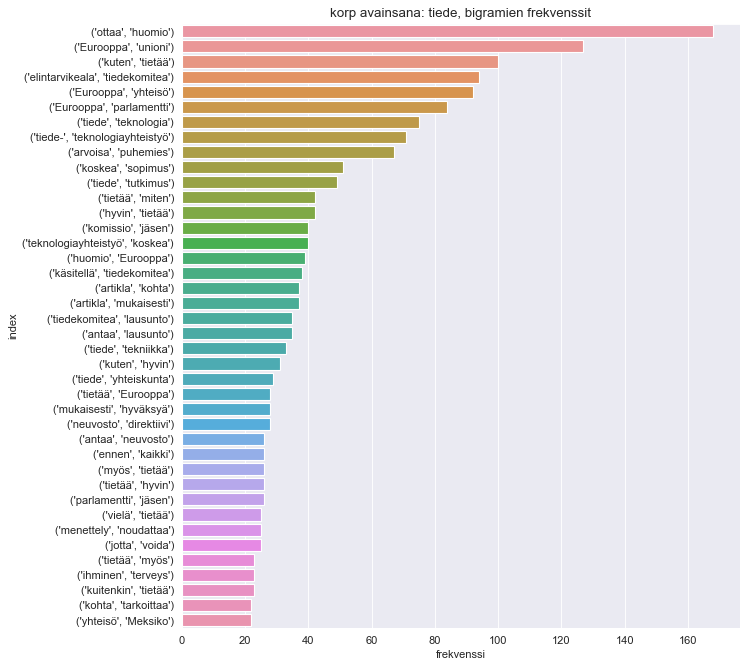

In [7]:
dfbg = pd.DataFrame.from_dict(wordfreq2, orient='index', columns=['frekvenssi'])
dfbg = dfbg.reset_index()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[9,10], dpi=80)
sns.set_style("darkgrid")
plt.title("korp avainsana: tiede, bigramien frekvenssit")
sns.barplot(x="frekvenssi", y="index", data=dfbg.sort_values(by='frekvenssi', ascending=False).head(40))

Datasetin bigramien frekvenssit vahvistavat aikaisempia havaintoja, mutta antavat hieman enemmän kontekstia. Bigramit osoittavat että foorumikeskusteluissa käsitellään etenkin mitä tiede tekee, kykenee, taikka väittää. Lisäksi, kuvaaja viittaa kuinka foorumikeskusteluissa vastakkainasetetaan tiedettä ja uskontoa.

## Korrelaatioanalyysi

In [23]:
import numpy as np

bow = pd.DataFrame(0, index=np.arange(len(testidata)), columns = list(list(df2["index"][df2["frekvenssi"] > 100])))
bow.shape

(2800, 67)

In [24]:
for i in range(len(testidata["lemmas"])):
    text = word_tokenize(list(testidata["lemmas"])[i])
    for word in text:
        for column in bow.columns:
            if str(word) == str(column):
                bow.loc[i, str(column)] += 1

In [25]:
corrSpear = bow.corr(method='spearman')
corrPears = bow.corr(method='pearson')
corrKend = bow.corr(method='kendall')

In [26]:
print("---SPEARMAN---")
indexList = [] # duplikaattien tarkistamiseksi
for column in corrSpear.columns:
    for index in corrSpear.index:
        if (corrSpear.loc[index, column] > 0.5 or corrSpear.loc[index, column] < -0.5) and corrSpear.loc[index, column] < 1.0:
            if [column, index] not in indexList: # duplikaattitarkistus
                indexList.append([index, column])
                print(index, column, str(round(corrSpear.loc[index, column], 3)))

print("\n---PEARSON---")
indexList = [] 
for column in corrPears.columns:
    for index in corrPears.index:
        if (corrPears.loc[index, column] > 0.5 or corrPears.loc[index, column] < -0.5) and corrPears.loc[index, column] < 1.0:
            if [column, index] not in indexList: # duplikaattitarkistus
                indexList.append([index, column])
                print(index, column, str(round(corrPears.loc[index, column], 3)))
                
print("\n---KENDALL---")
indexList = [] 
for column in corrKend.columns:
    for index in corrKend.index:
        if (corrKend.loc[index, column] > 0.5 or corrKend.loc[index, column] < -0.5) and corrKend.loc[index, column] < 1.0:
            if [column, index] not in indexList: # duplikaattitarkistus
                indexList.append([index, column])
                print(index, column, str(round(corrKend.loc[index, column], 3)))

---SPEARMAN---
ottaa huomio 0.634

---PEARSON---
jäsenvaltio komissio 0.543
neuvosto komissio 0.536
tieteellinen komissio 0.517
elintarvike komissio 0.568
koskeva komissio 0.629
direktiivi antaa 0.559
Eurooppa unioni 0.582
käyttää tarkoittaa 0.556
mukaisesti tarkoittaa 0.524
artikla tarkoittaa 0.597
direktiivi sellainen 0.676
koskea jäsenvaltio 0.509
elintarvike jäsenvaltio 0.558
koskeva jäsenvaltio 0.549
tieteellinen kysymys 0.567
elintarvike kysymys 0.658
koskeva kysymys 0.668
mukaisesti käyttää 0.565
artikla käyttää 0.576
huomio Eurooppa 0.585
ottaa Eurooppa 0.581
hyväksyä mukaisesti 0.8
artikla mukaisesti 0.882
artikla hyväksyä 0.755
yhteisö koskea 0.564
huomio yhteisö 0.541
ottaa yhteisö 0.521
ottaa huomio 0.9
lausunto huomio 0.538
päivä direktiivi 0.507
elintarvike tieteellinen 0.639
yhteistyö tieteellinen 0.549
koskeva tieteellinen 0.65
yhteistyö elintarvike 0.504
koskeva elintarvike 0.75
koskeva yhteistyö 0.556

---KENDALL---
ottaa huomio 0.633


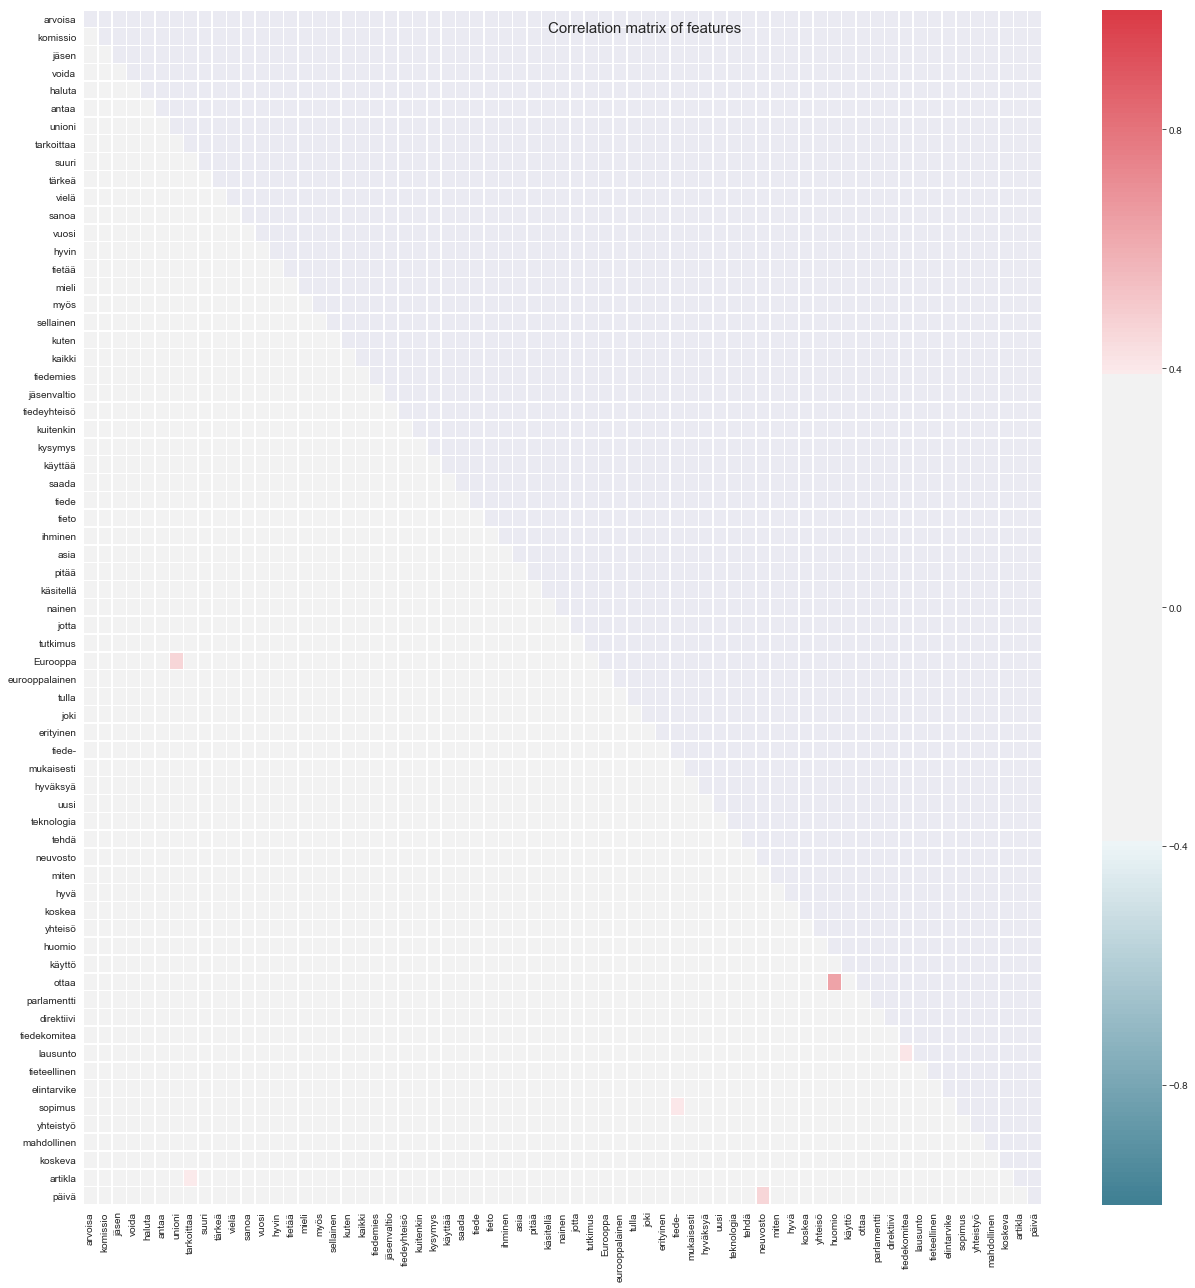

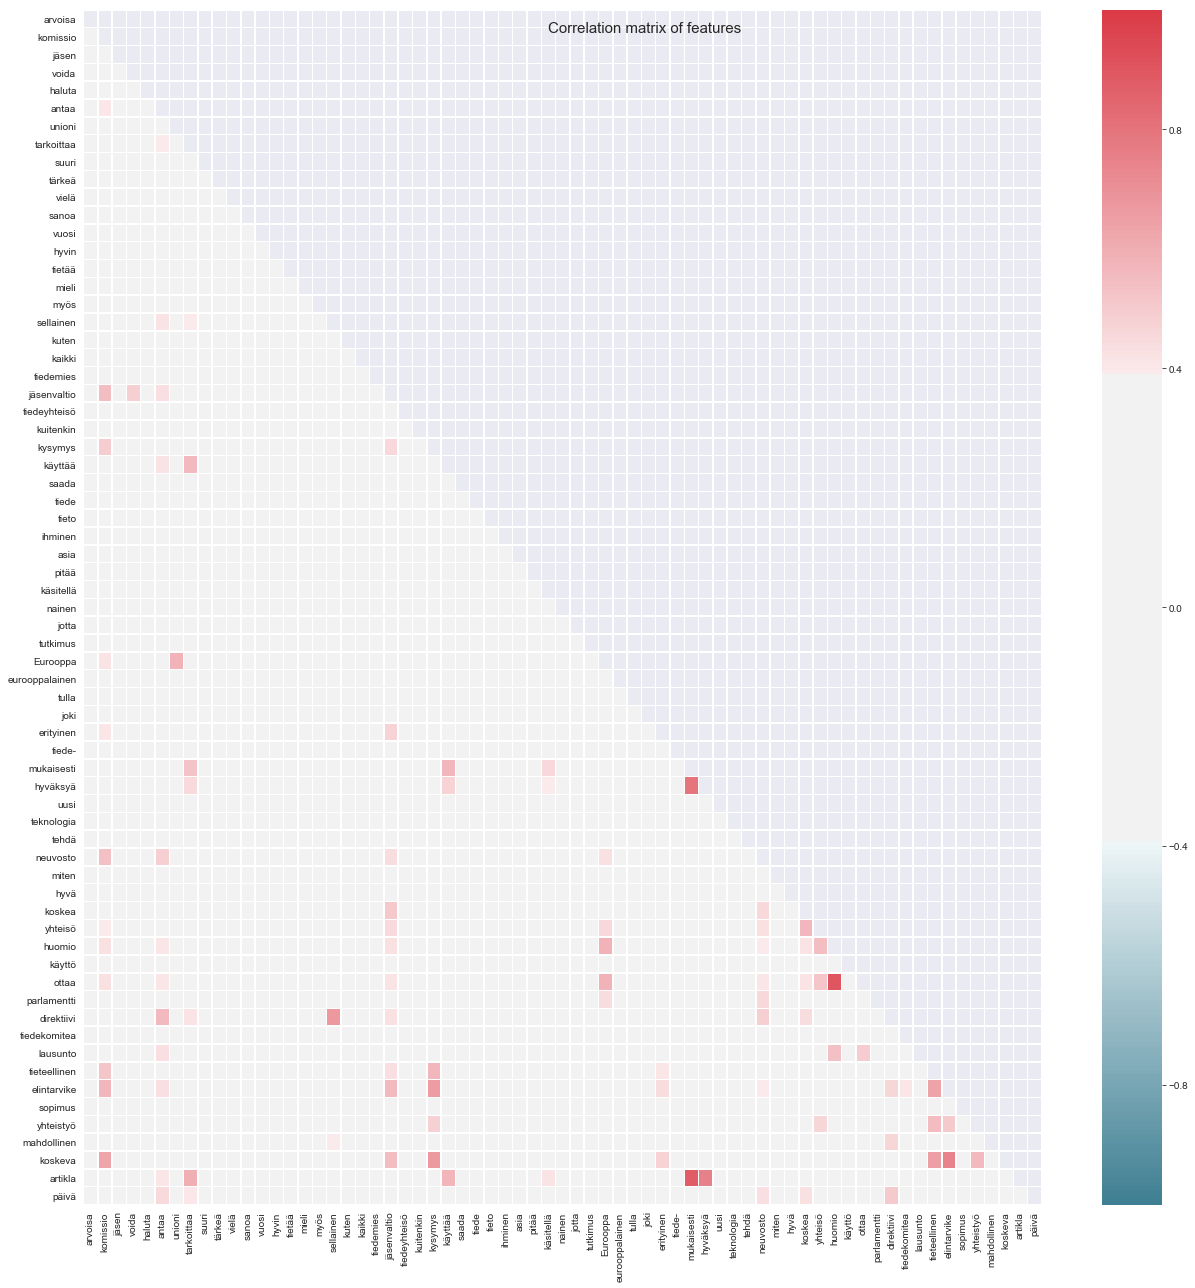

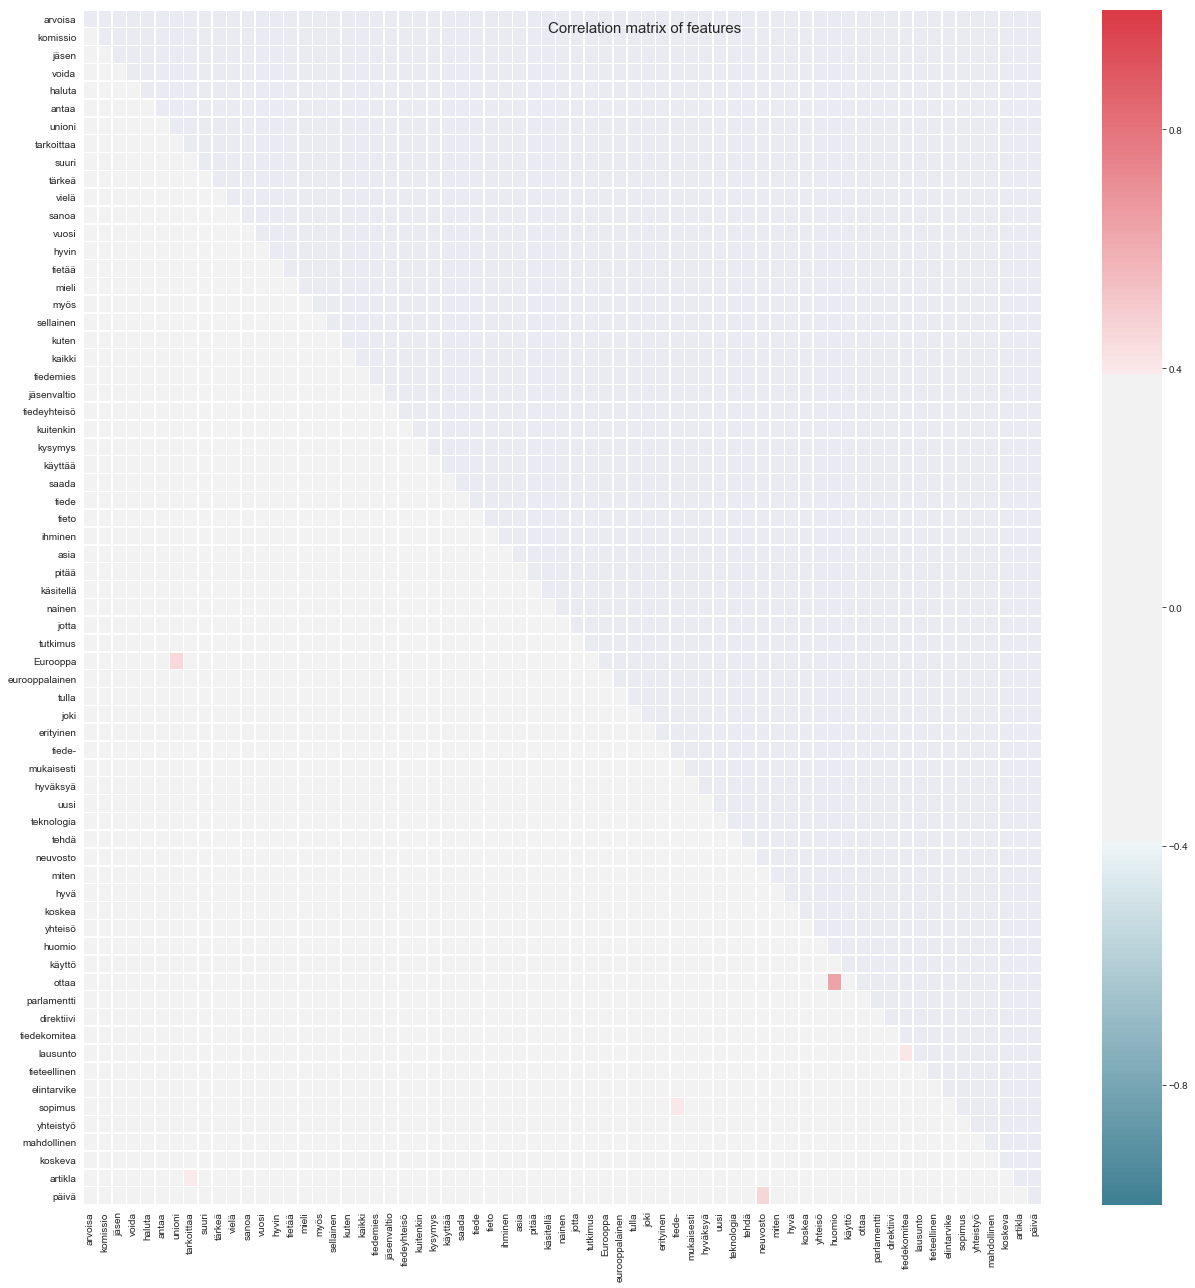

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

for corr in [corrSpear, corrPears, corrKend]:
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(18, 18))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

    fig.suptitle('Correlation matrix of features', fontsize=15)

    fig.tight_layout()

## Datasetin sanojen kosini-samankaltaisuuden visualisointi T-SNE-kuvaajalla

### tSNE-kuvaaja

<a href="https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding">"T-distributed Stochastic Neighbor Embedding"</a> (tSNE) on visualisointiin sovellettu koneoppimisalgoritmi, joka epälineaarisella ulottuvuudenpelkistyksellä muuttaa moniulotteisen tiedon kaksiulotteiseksi pistekaavioksi.

tSNE-kuvaajan luomiseksi ensin tehdään <a href="https://arxiv.org/abs/1301.3781">Word2vec</a> embedding sanastolle (muutetaan tekstidata numeraaliseksi matriisiksi), joka määrittää sanojen <a href="https://en.wikipedia.org/wiki/Cosine_similarity">kosini samankaltaisuuden</a>. Tällä voidaan määrittää sanojen väliset suhteet. Word2vec mallista voidaan sitten kehittää tSNE-kuvaaja.

Tämän harjoittelun pohjana käytin Susan Lin artikkelia <i><a href="https://towardsdatascience.com/understanding-word2vec-embedding-in-practice-3e9b8985953">Understanding Word2vec Embedding in Practice</a></i>.

<a href="https://towardsdatascience.com/word2vec-made-easy-139a31a4b8ae"><img src="https://miro.medium.com/max/1720/1*3Eh6afALesGJ_1fkmBxxnQ.png" alt="Word2vec.png" width="700" align="center"></a>

<a href="https://towardsdatascience.com/word2vec-made-easy-139a31a4b8ae"><img src="https://www.machinelearningplus.com/wp-content/uploads/2018/10/3d_projection-961x1024.png" alt="cosine_similarity.png" width="400" align="center"></a>


### Tekstin esikäsittely Word2veciä varten

In [14]:
def review_to_words(raw_review):
    import re
    #
    # 1. Poistetaan merkit, jotka eivät ole kirjaimia.        
    #
    letters_only = re.sub("[^a-öA-Ö]", " ", raw_review) 
    #
    # 2. Poistetaan isot kirjaimet ja pilkotaan lauseet yksittäisiksi sanoiksi.
    words = letters_only.lower().split()
    #
    # 3. Poistetaan stoppisanat
    # 
    stopWords = set(stopwords.words('finnish'))
    meaningful_words = [w for w in words if not w in stopWords and not len(w) < 2]  #returns a list 
    #
    # 4. poistetaan liian lyhyet sanat
    #
    meaningful_words = [word for word in meaningful_words if len(word) > 3] 
    #
    # 5. Yhdistetään sanat takaisin yhtenäisiksi lauseiksi.
    #
    return( " ".join( meaningful_words ))

processed_wmn = [ review_to_words(text) for text in testidata["lemmas"]]

### Sanafrekvenssien määritys tSNE-kuvaajaa varten

In [15]:
def wordfreqs(processed_wmn):

    wordfreq = {}
    tokens=[]
    
    for text in processed_wmn:
        tokens.append(word_tokenize(text))
        
    tokens = list(itertools.chain.from_iterable(tokens))
    
    # summataan sanojen frekvenssit dictiin
    for token in tokens:
            if token not in wordfreq.keys():
                wordfreq[token] = 1
            else:
                wordfreq[token] += 1
    
    # muutetaan sanafrekvenssien dict dataframeksi
    df = pd.DataFrame.from_dict(wordfreq, orient='index', columns=['frekvenssi'])
    df = df.reset_index()
    
    return df

wordfreq = wordfreqs(processed_wmn)

### Luodaan corpus Word2veciä varten

In [16]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for sentence in data:
        word_list = sentence.split(" ")
        corpus.append(word_list)    
           
    return corpus

corpus = build_corpus(processed_wmn)

### Luodaan Word2vec-malli

In [17]:
# load the word2vec algorithm from the gensim library
from gensim.models import word2vec
# run the model
model = word2vec.Word2Vec(corpus, size=100, window=6, min_count=10, workers=6, seed=1) # min_count=10 vastaa sanafrekvenssin minimimäärää

C:\Users\simory\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


### Luodaan tSNE-kuvaaja

C:\Users\simory\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



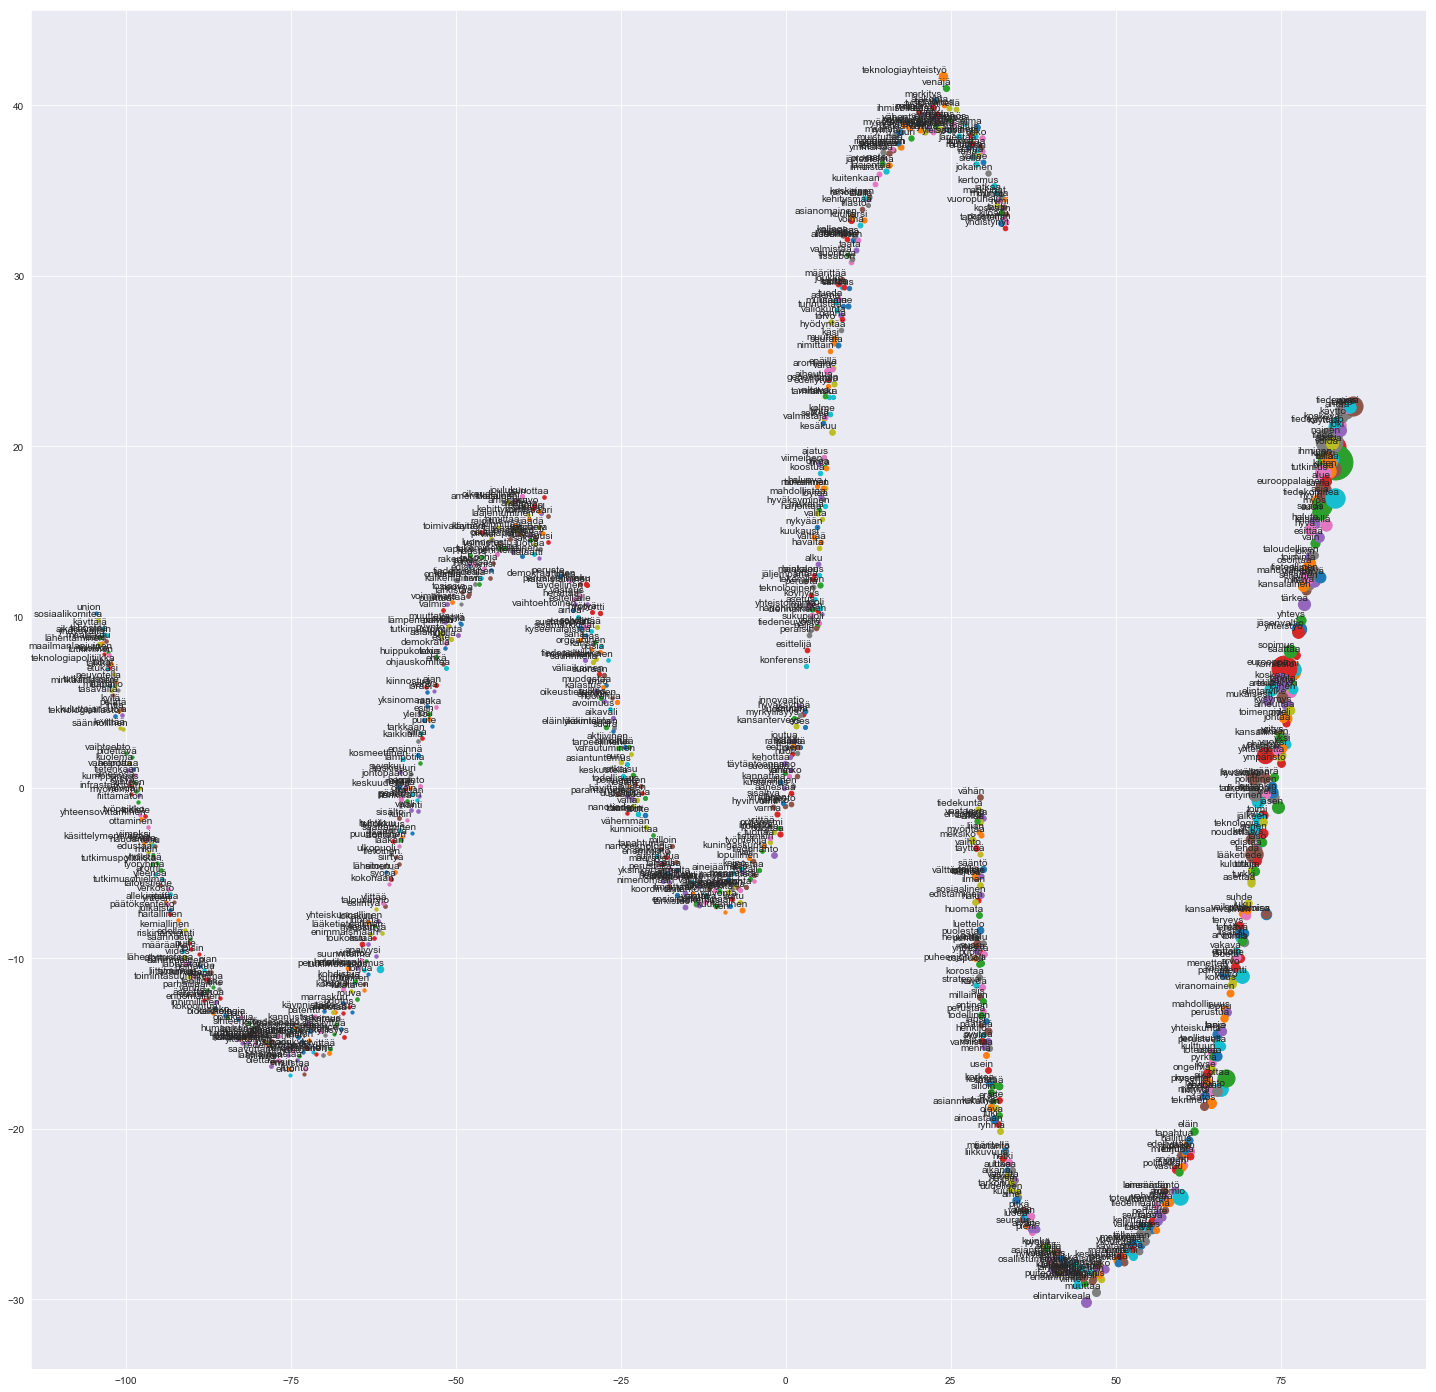

In [18]:
# import the t-SNE library and matplotlib for plotting
%matplotlib inline
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
from sklearn.preprocessing import normalize

# define the function to compute the dimensionality reduction
# and then produce the biplot
def tsne_plot(model, df):
    "Creates a TSNE model and plots it"
    labels = []
    tokens = []
    wordfreqs = []
    for word, frequence in zip(list(df["index"]), list(df["frekvenssi"])):
        for word2 in model.wv.vocab:
            if word == word2:
                wordfreqs.append(frequence)
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=20, n_components=2, init='pca', n_iter=2500)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    plt.figure(figsize=(25, 25)) 
    
    fig = go.Figure()
    
    for i in range(len(x)):
        plt.scatter(x[i],y[i], s=wordfreqs[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

    # Add traces
    fig.add_trace(go.Scatter(x=x, y=y,
                        marker=dict(size= [x/10 for x in wordfreqs]),
                        mode='markers',
                        text=labels))

    plt.show()
    fig.show()
    fig.write_html("T-SNE_sanaplot")

# call the function on our dataset
tsne_plot(model, wordfreq)

T-SNE-kuvaajan kehittymisessä on aina satunnaisuuden elementti, joten joka kerta kuvaaja tulee olemaan hieman erilainen. Siksi sanamerkityksien tulkinnassa se kelpaa vain erittäin pintapuoliseen arviointiin.